# Home Assignment 1
Due by 8th May, 2024 at 23:59 CEST

## Neural Network Basics

We want to create a 2 layer NN, which means we want to calculate  $y = W_2 * ReLU(W_1 * x + b_1) + b_2$

Complete the TODOs below to create such a NN.

Since you will be needing to compute the gradients w.r.t. all parameters, you may look into online resources for help. Please cite or link any online recources you do use.

You are allowed to change any existing parts, however the code has to remain easy to understand and well documented.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    """
    ReLU activation function
    
    Parameters:
        x (np.ndarray): numpy array with shape (m, n) where m is the number of dimensions and n is the number of points
        
    Returns:
        x' (np.ndarray): return value of the pointwise ReLU application
    """
    return np.maximum(0, x)


def relu_grad(x):
    # TODO: Write a function given a numpy array that calculates the gradient of the ReLU function w.r.t. `x`
    # TODO: Also write the derivation of the gradient in the PDF file In the implementation you may simply use the final derivation.
    # Hint: The function should return a numpy array of the same dimension that `x` has, but only containing 0 or 1
    arr = np.zeros(x.shape)
    return np.greater(x, arr).astype(int)


In [2]:
class NumPyNeuralNet:
    
    def __init__(self, dim_in, dim_hidden, dim_out):
        self.dim_in = dim_in
        self.dim_hidden = dim_hidden
        self.dim_out = dim_out
        
        # TODO: Randomly initialize the weight matrices W_1, W_2 and biases b_1, b_2
        # Hint: use np.random.randn() and make sure to correctly set the dimensions 

        # Scale random sample with 0.01 according to lecture
        self.W_1 = 0.01 * np.random.randn(self.dim_in, self.dim_hidden)
        self.b_1 = 0.01 * np.random.randn(self.dim_hidden)
        self.W_2 = 0.01 * np.random.randn(self.dim_hidden, self.dim_out)
        self.b_2 = 0.01 * np.random.randn(self.dim_out)

    def predict(self, x):
        """
        Calculates the output of the neural network for the given x.
        
        Parameters:
            x (np.ndarray): input value numpy array
        
        Returns:
            y (np.ndarray): predicted output for `x`
        """
        # TODO: Calculate output self.out
        # Safe intermediate results as cache for later backpropagation
        self.h_1 = np.dot(x, self.W_1) + self.b_1
        self.h_1_act = relu(self.h_1)
        self.out = np.dot(self.h_1_act, self.W_2) + self.b_2
        return self.out
    
    
    def loss(self, x, y):
        """
        Calculates the Mean-Squared Error and returns the gradients w.r.t. to the parameters.
        
        Parameters:
            x (np.ndarray): input value numpy array with shape (self.dim_in, n)
            y (np.ndarray): ground truth value numpy array with shape (self.dim_out, n)
            
        Returns:
            loss (float): Mean-Squared-Error between predicted value on input points and ground truth value
            W_1_grad (np.ndarray): gradient w.r.t W_1   
            W_2_grad (np.ndarray): gradient w.r.t W_2  
            b_1_grad (np.ndarray): gradient w.r.t b_1   
            b_2_grad (np.ndarray): gradient w.r.t b_2   
        """
        # TODO: Calculate the loss (Mean-Squared-Error)
        # Hint: use np.square() and np.mean()

        y_pred = self.predict(x)
        loss = np.mean(np.square(y_pred - y))
        
        # TODO: Calculate all gradients w.r.t to the parameters
        # Hint: You need to calculate the gradients for each of the parameters by hand
        # TODO: Also write the derivation of the gradient in the PDF file. In the implementation you may simply use the final derivation.

        loss_derived = 2 * (self.out - y) / len(y)
        
        h_1_grad = np.dot(loss_derived, self.W_2.T) * relu_grad(self.h_1)
        
        W_2_grad = np.dot(self.h_1_act.T, loss_derived)
        b_2_grad = np.sum(loss_derived, axis=0)
        W_1_grad = np.dot(x.T, h_1_grad)
        b_1_grad = np.sum(h_1_grad, axis=0)

        return loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad
         
    def train(self, x, y, lr=0.001, epochs=1000):
        """
        Train the neural network with gradient descent.
        
        Parameters:
            x (np.ndarray): input values
            y (np.ndarray): ground truth values
            lr (float): learning rate, default: 0.001
            epochs (int): number of epochs to train, default: 1000
            
        Returns:
            loss (float): Return the loss achieved after all epochs
        """
        # TODO: Keep track of the loss
        loss_history = []
        n = len(x)
        
        for epoch in range(epochs):
            
            # shuffle dataset
            idx = np.arange(n)
            np.random.shuffle(idx)
            x_shuffled = x[idx]
            y_shuffled = y[idx]

            for i in range(n):
                dp_x = x_shuffled[i]
                dp_y = y_shuffled[i]
                
                loss, W_1_grad, W_2_grad, b_1_grad, b_2_grad = self.loss(dp_x.reshape(1,-1), dp_y.reshape(1,-1))
                
                self.W_1 -= lr * W_1_grad
                self.W_2 -= lr * W_2_grad
                self.b_1 -= lr * b_1_grad
                self.b_2 -= lr * b_2_grad

                loss_history.append(loss)
            
            
            # print mean loss of dataset every 10% of epochs
            e = int(epochs / 10)
            if epoch % e == 0:
                print(f'Epoch {epoch}, Loss: {np.mean(loss_history[-n:])}')

        
        # TODO: Plot the loss history and return the loss achieved after the final epoch
        # Plot the loss history after every epoch. Returned is the mean loss of the last epoch.
        loss_per_epoch = [np.mean(loss_history[i*n:(i+1)*n]) for i in range(epochs)]
        plt.plot(loss_per_epoch)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss')
        plt.show()

        return loss_per_epoch[-1]

Epoch 0, Loss: 2.3666745753743754
Epoch 100, Loss: 0.0036042473205988306
Epoch 200, Loss: 0.0013828907632766091
Epoch 300, Loss: 0.0008922379773640516
Epoch 400, Loss: 0.0007103713863246147
Epoch 500, Loss: 0.0006294838922891847
Epoch 600, Loss: 0.0005601103028571541
Epoch 700, Loss: 0.0005189778265737468
Epoch 800, Loss: 0.0004907267323295599
Epoch 900, Loss: 0.00046427101441351735


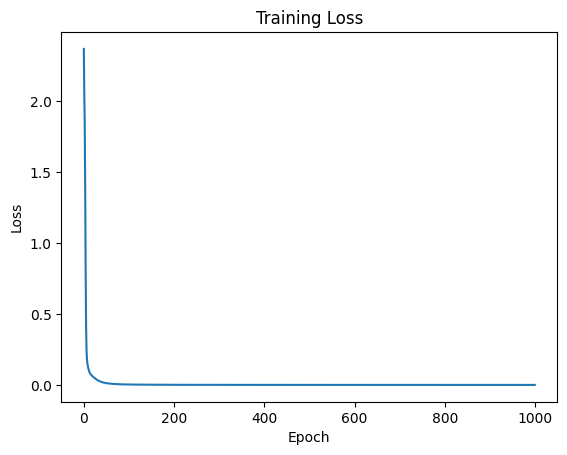

loss after final epoch: 0.0004366728639815288
Example predictions of model: 
x:0.4 y:[[0.17792394]]
x:0.5 y:[[0.25826863]]
x:0.7 y:[[0.4666888]]

 if these examples are predicted badly, the model might only perform well on training set


In [3]:
# We test the model created above on the simple function y = x^2

model = NumPyNeuralNet(1, 30, 1)

# Create a randomly distributed array of 1000 values between 0 and 1
x_train = 1 * np.random.randn(1000, 1)
# Create ground truth by calculating x*x
y_train = x_train * x_train

# Train for default epochs
loss = model.train(x_train, y_train)
print("loss after final epoch: " + str(loss))
example_1 = 0.4
example_2 = 0.5
example_3 = 0.7
print("Example predictions of model: " + "\n" + "x:" + str(example_1) + " y:" + str(model.predict(example_1)) + "\n"
      + "x:" + str(example_2) + " y:" + str(model.predict(example_2)) + "\n" + "x:" + str(example_3) + " y:" + str(model.predict(example_3)))
print("\n if these examples are predicted badly, the model might only perform well on training set")

## Embeddings

### Intrinsic evaluation of embeddings
Word similarity task is often used as an intrinsic evaluation criteria. In the dataset file you will find a list of word pairs with their similarity scores as judged by humans. The task would be to judge how well are the word vectors aligned to human judgement. We will use word2vec embedding vectors trained on the google news corpus. (Ignore the pairs where at least one the words is absent in the corpus)

In [ ]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=-------------------------------------------------] 3.7% 61.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==------------------------------------------------] 5.9% 98.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 8.2% 136.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====---------------------------------------------] 10.5% 174.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======--------------------------------------------] 12.7% 211.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 15.0% 249.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.2% 286.7/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.5% 324.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========----------------------------------------] 21.8% 362.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 24.0% 399.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 26.3% 437.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============------------------------------------] 28.6% 474.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 30.8% 512.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 33.1% 550.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.4% 587.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================--------------------------------] 37.6% 625.6/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.9% 663.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 42.2% 700.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 44.4% 738.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 46.7% 776.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.9% 813.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.2% 851.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================------------------------] 53.5% 889.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 55.7% 926.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 58.0% 964.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.3% 1002.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 62.5% 1039.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.8% 1077.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================-----------------] 67.1% 1115.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================----------------] 69.3% 1152.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===================================---------------] 71.6% 1190.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 73.9% 1228.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[======================================------------] 76.1% 1265.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=======================================-----------] 78.4% 1303.5/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.6% 1340.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=========================================---------] 82.9% 1378.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==========================================--------] 85.1% 1415.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.4% 1453.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 89.7% 1491.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=============================================-----] 91.9% 1528.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================---] 94.2% 1566.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.5% 1604.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 98.0% 1629.5/1662.8MB downloaded

In [8]:
# additional libraries from students
from gensim.models import Word2Vec
import torch as torch
import numpy as np
import csv
from torchmetrics import SpearmanCorrCoef

In [9]:
def load_data():
    data = []      
    isFirstLine = True
    for line in open('wordsim353_dataset.csv'):
        if isFirstLine:
            isFirstLine = False
            continue
        indices = [i for i, x in enumerate(line) if x == ","]
        w1 = line[:indices[0]]
        w2 = line[indices[0]+1:indices[1]]
        mean = float(line[indices[1]+1:].rstrip())
        # print(f"w1: {w1}, w2: {w2}, mean: {mean}")
        data.append((w1, w2, mean))
    return data

# data = load_data()
# print(data)

Write a function which takes as input two words and computes the cosine similarity between them.
You do not need to implement the cosine similarity calculation from scratch. Feel free to use any Python library.
Remeber to ignore any pairs where at least one word is absent in the corpus. (2 points)

In [10]:
def similarity(word1, word2):
    # TODO: check missing words
    cos = nn.CosineSimilarity(dim=0)
    output = cos(word1, word2)
    return output


Compute the similarity between all the word pairs in the list and sort them based on the similarity scores. (1 point)

In [11]:
def word2vec(w):
    return torch.from_numpy(wv[w])

In [12]:
def compute_similarity_scores(data):
    # data = load_data()
    scores = []
    
    # # scores = torch.tensor([])

    for w1, w2, mean in data:
        # empty words
        if not w1 or not w2:
            continue

        # word2vec as tensors for cos_score
        w1_vec = torch.from_numpy(wv[w1])
        w2_vec = torch.from_numpy(wv[w2])
        cos_score = similarity(w1_vec, w2_vec)
        
        scores.append([w1, w2, cos_score.item()])
        # # scores = torch.cat((prev_word, word, cos_score.reshape(1)))
    return sorted(scores, key=lambda entry: entry[2])
# sim_scores = compute_similarity_scores(load_data())
# print(len(sim_scores))
# print(sim_scores)

Sort the word pairs in the list based on the human judgement scores. (1 point)

In [13]:
def human_judgement_scores(data):
    # data = load_data()
    return sorted(data, key=lambda entry: entry[2])
# human_scores = human_judgement_scores(loaddata())
# print(human_scores)

Compute spearman rank correlation between the two ranked lists obtained in the previous two steps.
You do not need to implement the spearman rank correlation calculation from scratch. Feel free to use any Python library. (2 points)

In [18]:
def compute_spearman():
    data = load_data()
    print(data)

    sim_score = np.array(compute_similarity_scores(data))
    human_score = np.array(human_judgement_scores(data))

    # use third column of dataset (mean/cos_similarity)
    preds = torch.from_numpy(sim_score[:, 2].astype(float))
    target = torch.from_numpy(human_score[:, 2].astype(float))

    spearman = SpearmanCorrCoef()
    return spearman(preds, target)
    
compute_spearman()

[('love', 'sex', 6.77), ('tiger', 'cat', 7.35), ('tiger', 'tiger', 10.0), ('book', 'paper', 7.46), ('computer', 'keyboard', 7.62), ('computer', 'internet', 7.58), ('plane', 'car', 5.77), ('train', 'car', 6.31), ('telephone', 'communication', 7.5), ('television', 'radio', 6.77), ('media', 'radio', 7.42), ('drug', 'abuse', 6.85), ('bread', 'butter', 6.19), ('cucumber', 'potato', 5.92), ('doctor', 'nurse', 7.0), ('professor', 'doctor', 6.62), ('student', 'professor', 6.81), ('smart', 'student', 4.62), ('smart', 'stupid', 5.81), ('company', 'stock', 7.08), ('stock', 'market', 8.08), ('stock', 'phone', 1.62), ('stock', 'CD', 1.31), ('stock', 'jaguar', 0.92), ('stock', 'egg', 1.81), ('fertility', 'egg', 6.69), ('stock', 'live', 3.73), ('stock', 'life', 0.92), ('book', 'library', 7.46), ('bank', 'money', 8.12), ('wood', 'forest', 7.73), ('money', 'cash', 9.15), ('professor', 'cucumber', 0.31), ('king', 'cabbage', 0.23), ('king', 'queen', 8.58), ('king', 'rook', 5.92), ('bishop', 'rabbi', 6.69

tensor(1.0000)

### Word embedding based clasifier
We will design a simple sentiment classifier based on the pre-trained word embeddings (google news).

Each data point is a movie review and the sentiment could be either positive (1) or negative (0)

In [19]:
import pickle
with open('sentiment_test_X.p', 'rb') as fs:
    test_X = pickle.load(fs)

len(test_X)

1821

In [20]:
test_X[0]

['If',
 'you',
 'sometimes',
 'like',
 'to',
 'go',
 'to',
 'the',
 'movies',
 'to',
 'have',
 'fun',
 ',',
 'Wasabi',
 'is',
 'a',
 'good',
 'place',
 'to',
 'start',
 '.']

In [22]:
with open('sentiment_test_y.p', 'rb') as fs:
    test_y = pickle.load(fs)
    
len(test_y)

1821

In [23]:
test_y[0]

1

In [24]:
with open('sentiment_train_X.p', 'rb') as fs:
    train_X = pickle.load(fs)
with open('sentiment_train_y.p', 'rb') as fs:
    train_y = pickle.load(fs)
with open('sentiment_val_X.p', 'rb') as fs:
    val_X = pickle.load(fs)
with open('sentiment_val_y.p', 'rb') as fs:
    val_y = pickle.load(fs)        

Given a review, compute its embedding by averaging over the embedding of its constituent words. Define a function which given a review as a list of words, generates its embeddings by averaging over the constituent word embeddings. (4 points)

In [374]:
def generate_embedding(review):
    res = np.mean([wv[word] for word in review if word in wv], axis=0)
    # print(res)
    # print(res.shape)
    # print(review)
    if np.isnan(res).any():
        return np.zeros(300)
    return res

# [word1, word2, word3]
# [wv1, wv2,]

# generate_embedding(test_X[0])
# generate_embedding(train_X[0])


Create a feed-forward network class with pytorch. (Hyperparamter choice such as number of layers, hidden size is left to you) (8 points)

In [375]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_1_size, hidden_2_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.output_size = output_size
        
        self.fc_1 = nn.Linear(self.input_size, self.hidden_1_size)
        self.fc_2 = nn.Linear(self.hidden_1_size, self.hidden_2_size)
        self.fc_3 = nn.Linear(self.hidden_2_size, self.output_size)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        torch.nn.init.xavier_uniform_(self.fc_1.weight)
        torch.nn.init.xavier_uniform_(self.fc_2.weight)
        torch.nn.init.xavier_uniform_(self.fc_3.weight)

    def forward(self, x):
        h_1 = self.relu(self.fc_1(x))
        h_2 = self.relu(self.fc_2(h_1))
        y = self.fc_3(h_2)
        return self.sigmoid(y)


Create a Dataset class for efficiently enumerating over the dataset. (3 points)

In [376]:
class sent_data(Dataset):
    def __init__(self, data_points, class_labels):
        super(Dataset, self).__init__()
        self.data = data_points
        self.labels = class_labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        d = torch.FloatTensor(generate_embedding(self.data[index]))
        l = torch.FloatTensor([self.labels[index]])
        return d,l

Write a train function to train model. At the end of each epoch compute the validation accuracy and save the model with the best validation accuracy. (12 points)

In [377]:
from tqdm import tqdm
from torch.optim import Adam

In [603]:
# Helper Function to calculate the accuracy
def calc_accuracy(gts, preds):
    correct = sum(1 for tc, pred in zip(gts, preds) if tc == pred)
    total = len(gts)
    return correct / total

In [604]:
from tqdm import tqdm
from torch.optim import Adam
# Adopt your code to incorporate mini-batch training
# Use cross-entropy as your loss function
def train(model, train_data, val_data, batch_size, epochs=5, learning_rate=0.001):
    optimizer = Adam(model.parameters(), lr=learning_rate)
    lossfn = nn.BCELoss()
    best_accuracy = 0.0
    for _ in tqdm(range(epochs)):
        model.train()
        train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        for d, l in train_dataloader:
            out = model(d)
            # print(d)
            # print(len(d))
            # print(out)
            # print(out.shape)
            # print(l)
            # print(l.shape)
            # print(len(l))
            loss =  lossfn(out, l)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        model.eval()
        val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
        true_classes = []
        predicted_classes = []
        for d, l in val_dataloader:
            out = model(d)
            true_classes.extend(l.squeeze(1).tolist())
            predictions = torch.where(out > 0.5, 1, 0) # for two classes and out in (0,1) this should be enough for class probabilities? 
            predicted_classes.extend(predictions.squeeze(1).tolist())
            
        # Calculate the Accuracy
        accuracy = calc_accuracy(true_classes, predicted_classes)

        #Check whether current model is better than best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model.state_dict()
            
    # Save the best model
    torch.save(best_model, 'best_model.pth')

Evaluate the trained model on the test set and report the test accuracy. (3 points)

In [605]:
def evaluate(model, test_data):
    model.eval()
    test_dataloader = DataLoader(test_data)
    true_classes = []
    predicted_classes = []
    for d,l in test_dataloader:
        out = model(d)
        true_classes.extend(l)
        predictions = torch.where(out > 0.5, 1, 0)
        predicted_classes.extend(predictions.squeeze(1).tolist())
        
    # Calculate the Accuracy
    accuracy = calc_accuracy(true_classes, predicted_classes)

    print("The accuracy of the best model on the test set is: " + str(accuracy))

In [618]:
# REMEMBER: Maybe implement GPU training for faster execution
train_data = sent_data(train_X, train_y)
val_data = sent_data(val_X, val_y)
test_data = sent_data(test_X, test_y)
model = Classifier(300, 100, 50, 1)
batch_size = 16
epochs = 20
train(model, train_data, val_data, batch_size, epochs)
best_model_state = torch.load('best_model.pth')
model.load_state_dict(best_model_state)
evaluate(model, test_data)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:25<00:00,  1.25s/it]


The accuracy of the best model on the test set is: 0.7896760021965953


In [619]:
#tests
print(model.forward(torch.Tensor(wv["good"])))
print(model.forward(torch.Tensor(wv["awful"])))
print(model.forward(torch.Tensor(wv["eventually"])))
print(model.forward(torch.Tensor(wv["boring"])))

tensor([1.], grad_fn=<SigmoidBackward0>)
tensor([1.6015e-26], grad_fn=<SigmoidBackward0>)
tensor([0.0001], grad_fn=<SigmoidBackward0>)
tensor([2.7837e-19], grad_fn=<SigmoidBackward0>)
